# P04-02: The Watts-Strogatz Model

*November 16th 2022*

In the second unit we implement the Watts-Strogatz model and explore how its parameters influence those characteristics that are associated with the small-world property of (social) networks.

In [1]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

# The Watts-Strogatz model

The following function implements the Watts-Strogatz model for a lattice dimensionality of $d=1$, i.e. for the ring lattice as presented in theory lecture L04.

In [2]:
lattice = pp.generators.lattice_network(0, 5, 1)
lattice.plot()

In [9]:
def WattsStrogatz(n, s, p):

    network = pp.Network(directed=False)

    # construct a ring lattice (dimension 1)
    for i in range(n):
        for j in range(1, s+1):            
            if (str(i), str((i+j)%n)) not in network.edges:
                network.add_edge(str(i), str((i+j)%n))

    if p == 0:
        # nothing to do here
        return network

    # Rewire each link with probability p
    for edge in list(network.edges):
        if np.random.rand() < p:
            # Delete original link and remember source node
            v = edge.v.uid
            network.remove_edge(edge)

            # Find new random tgt, which is not yet connected to src
            new_target = None

            # This loop repeatedly chooses a random target until we find
            # a target not yet connected to src.
            neighbours=[node.uid for node in network.successors[v]]
            while new_target is None:
                x = str(np.random.randint(n))
                if x != v and x not in neighbours:
                    new_target = x
            network.add_edge(v, new_target)
    return network

With this, we can generate and plot random realisations with $n=100$ nodes and different rewiring probabilities of $p=0$, $p=0.04$ and $p=1$. We use the implementation of a lattice layout in `pathpy`, which allows us to arrange nodes in a ring topology.

In [12]:
n = WattsStrogatz(100, 3, 0)
l = pp.layout(n, layout='lattice', dimension=1)
n.plot(layout=l, width=800, height=800)

In [13]:
n = WattsStrogatz(100, 3, 0.04)
n.plot(layout=l, width=800, height=800)

SyntaxError: keyword argument repeated (<ipython-input-13-b155c9d4c95d>, line 2)

In [5]:
n = WattsStrogatz(100, 3, 1)
n.plot(layout=l, width=800, height=800)

In `pathpy` the Watts-Strogatz model is implemented in the function `pp.generators.Watts_Strogatz`:

In [6]:
n = pp.generators.Watts_Strogatz(100, 3, 0.5)
n.plot(layout=l, width=800, height=800)

# The small-world regime of the Watts-Strogatz model

In order to explore the parameter regime for which the Watts-Strogatz model generates small-world networks, i.e. networks that combine a small diameter with a large clustering coefficient, we generate a number of random Watts-Strogatz networks for a fixed value of $n=100$ and a number of logarithmically-spaced values of the rewiring parameter $p$. For each value of $p$ generate 20 samples and calculate the average shortest path length and the average global clustering coefficient across these samples.

In [7]:
def plot_small_world(n, p_range, samples=1):
    ccs = []
    apls = []
    
    for p in p_range:
        cc = 0
        apl = 0
        for i in range(samples):
            ws = pp.generators.random_graphs.Watts_Strogatz(n, s=3, p=p)
            cc += pp.statistics.avg_clustering_coefficient(ws)
            apl += pp.algorithms.avg_path_length(ws)
        ccs.append(cc/samples)
        apls.append(apl/samples)
        print('Finished for p = {0}'.format(p))
        
    plt.clf()
    x = plt.plot(p_range, ccs)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)     
    plt.grid(True)
    plt.xscale('log')
    plt.xlabel('$p$', fontsize=20)
    plt.ylabel('average clustering coefficient', fontsize=20)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)
    plt.show()
    
    plt.clf()
    x = plt.plot(p_range, apls)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)     
    plt.grid(True)
    plt.xscale('log')
    plt.xlabel('$p$', fontsize=20)
    plt.ylabel('average shortest path length', fontsize=20)
    plt.subplots_adjust(bottom=0.15)
    plt.subplots_adjust(left=0.25)
    plt.show()

We now plot the average shortest path length and the average clustering coefficient (both on the y-axis) against the rewiring probability $p$ (we use a log-scale for the x-axis):

Finished for p = 0.001
Finished for p = 0.0021544346900318843
Finished for p = 0.004641588833612777
Finished for p = 0.01
Finished for p = 0.021544346900318832
Finished for p = 0.046415888336127774
Finished for p = 0.1
Finished for p = 0.21544346900318823
Finished for p = 0.46415888336127775
Finished for p = 1.0


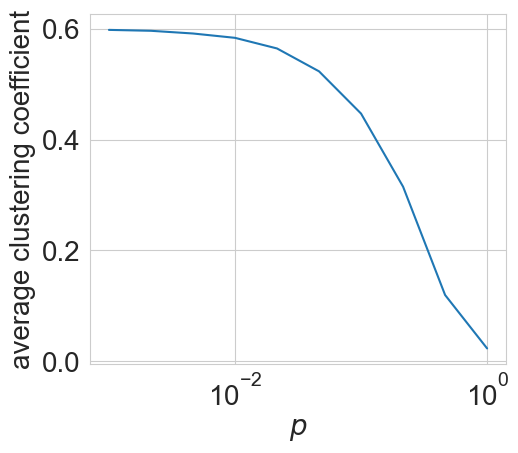

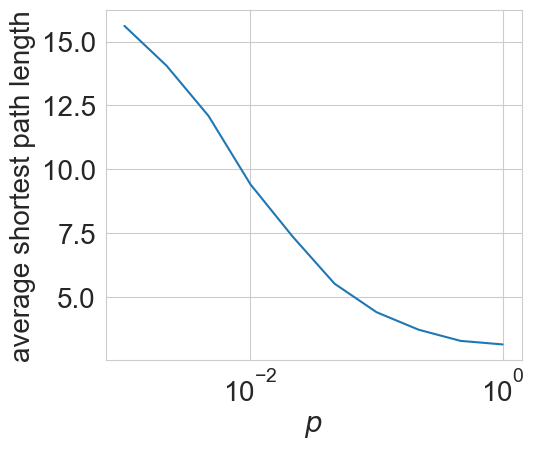

In [8]:
p_range = np.logspace(-3, 0, 10)
plot_small_world(200, p_range, samples=10)